In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline  
#plt.style.use('fivethirtyeight')

In [176]:
def plotFunction(x, y):
    temp_figure = plt.figure()
    plt.scatter(x,y)
    plt.title(y.name + " vs. " + x.name)
    plt.xlabel(x.name, fontsize=16)
    plt.ylabel(y.name, fontsize=16)
    plt.show()
    return temp_figure

## Question 1A

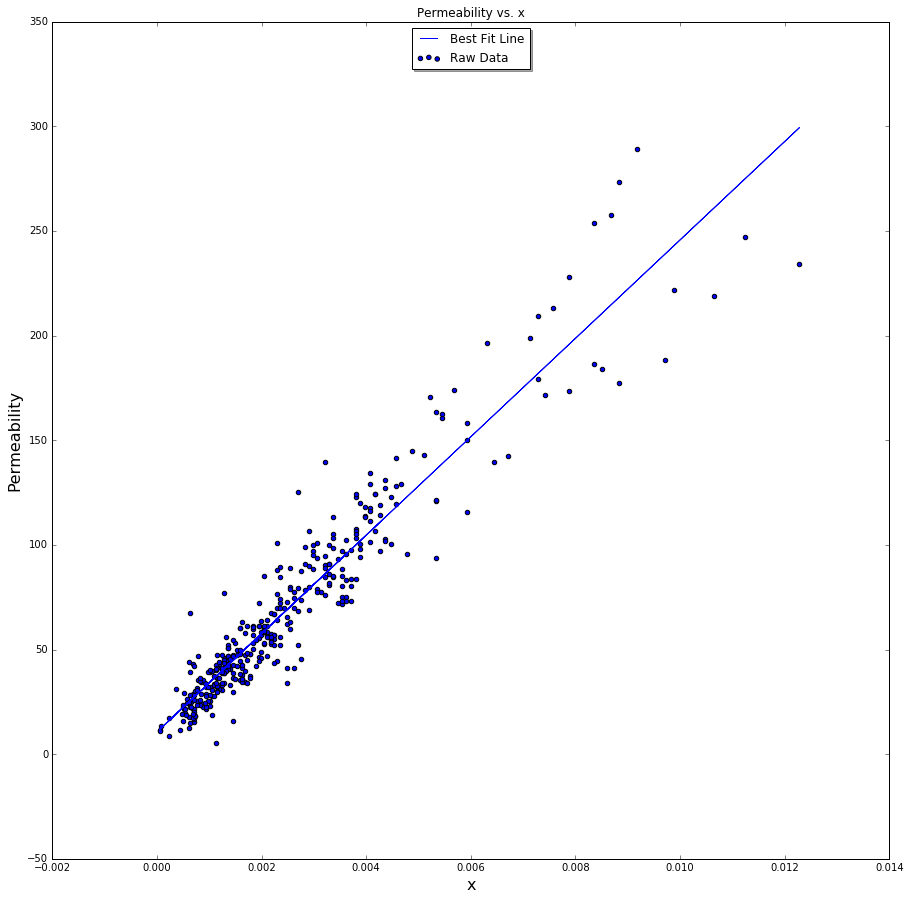

Kozeny-Carmen Relationship:
Slope = 23517.3519555
Intercept = 10.5933126683
R-value = 0.951580658183


In [188]:
# Process poro_derm.dat file as a panda df
df = pd.read_csv('poro_perm.dat', sep='\s+', header=None)
df.columns = ['Porosity', 'Permeability']

# Calculate x
df['x'] = (df.Porosity**3)/(1-df.Porosity)**2

# Perform linear regression of y = Permeability vs. x
slope, intercept, r_value, p_value, std_err = stats.linregress(df.x, df.Permeability)
# A = np.array([ df.x, np.ones(df.x.size)])
# a = np.linalg.lstsq(A.T, df.Permeability)[0]
# print(a)

# Start Plotting
fig, ax = plt.subplots(figsize=(15, 15), dpi=600)
ax.scatter(df.x,df.Permeability, label="Raw Data")
ax.plot(df.x,slope*df.x + intercept, label="Best Fit Line")

# Add stuff
legend = ax.legend(loc='upper center', shadow=True)
plt.title("Permeability" + " vs. " + "x")
plt.xlabel("x", fontsize=16)
plt.ylabel("Permeability", fontsize=16)
plt.show()

# Print the results of the best fit line
print("Kozeny-Carmen Relationship:")
print("Slope = " + str(slope))
print("Intercept = " + str(intercept))
print("R-value = " + str(r_value))

fig.savefig('Kozeny-Carmen.png')


## Question 1B

In [178]:
# Process Nechelik.dat.dat file as a panda df
nech_df = pd.read_csv('Nechelik.dat', sep='\s+', header=None, prefix="x")
# nech_df.shape

In [179]:
new_x = (nech_df**3)/(1-nech_df)**2
new_x.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001818,0.00238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001818,0.00238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001818,0.00238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001818,0.00238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001818,0.00238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
new_k = slope * new_x + intercept
new_k.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.35245,66.570579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.35245,66.570579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.35245,66.570579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.35245,66.570579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,53.35245,66.570579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
# Create meshgrid for x_coords
x = np.linspace(0, 130.75*53, num=54, endpoint=True, retstep=False, dtype=None)
x_coords = pd.DataFrame(np.array([x,]*22))
x_coords.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,130.75,261.5,392.25,523.0,653.75,784.5,915.25,1046.0,1176.75,...,5753.0,5883.75,6014.5,6145.25,6276.0,6406.75,6537.5,6668.25,6799.0,6929.75
1,0.0,130.75,261.5,392.25,523.0,653.75,784.5,915.25,1046.0,1176.75,...,5753.0,5883.75,6014.5,6145.25,6276.0,6406.75,6537.5,6668.25,6799.0,6929.75
2,0.0,130.75,261.5,392.25,523.0,653.75,784.5,915.25,1046.0,1176.75,...,5753.0,5883.75,6014.5,6145.25,6276.0,6406.75,6537.5,6668.25,6799.0,6929.75
3,0.0,130.75,261.5,392.25,523.0,653.75,784.5,915.25,1046.0,1176.75,...,5753.0,5883.75,6014.5,6145.25,6276.0,6406.75,6537.5,6668.25,6799.0,6929.75
4,0.0,130.75,261.5,392.25,523.0,653.75,784.5,915.25,1046.0,1176.75,...,5753.0,5883.75,6014.5,6145.25,6276.0,6406.75,6537.5,6668.25,6799.0,6929.75


In [182]:
# Create meshgrid for y_coords
y = np.linspace(0, 261.5*21, num=22, endpoint=True, retstep=False, dtype=None)
y_coords = pd.DataFrame(np.array([y,]*54).transpose())
y_coords.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,261.5,261.5,261.5,261.5,261.5,261.5,261.5,261.5,261.5,261.5,...,261.5,261.5,261.5,261.5,261.5,261.5,261.5,261.5,261.5,261.5
2,523.0,523.0,523.0,523.0,523.0,523.0,523.0,523.0,523.0,523.0,...,523.0,523.0,523.0,523.0,523.0,523.0,523.0,523.0,523.0,523.0
3,784.5,784.5,784.5,784.5,784.5,784.5,784.5,784.5,784.5,784.5,...,784.5,784.5,784.5,784.5,784.5,784.5,784.5,784.5,784.5,784.5
4,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,...,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0,1046.0


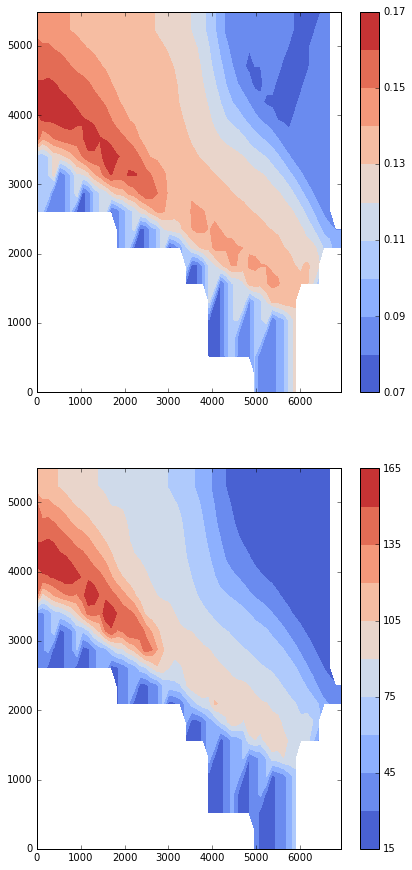

In [183]:
fig = plt.figure(figsize=(15, 15), dpi=600)
ax = fig.add_subplot(2, 2, 1)
origin = 'lower'
countour_nech = plt.contourf(x_coords, y_coords, nech_df, 10,
                  cmap=plt.cm.coolwarm,
                  origin=origin)
fig.colorbar(countour_nech)

ax = fig.add_subplot(2, 2, 3)
countour_k = plt.contourf(x_coords, y_coords, new_k, 10,
                  cmap=plt.cm.coolwarm,
                  origin=origin)
fig.colorbar(countour_k)

In [184]:
ax = fig.add_subplot(2,2,2, projection='3d')
surf = ax.plot_surface(x_coords, y_coords, nech_df, cmap=cm.coolwarm)
fig.colorbar(surf)


In [185]:
ax = fig.add_subplot(2,2,4, projection='3d')
surf_k = ax.plot_surface(x_coords, y_coords, new_k, cmap=cm.coolwarm)
fig.colorbar(surf_k)

In [186]:
fig.savefig('picToPrint.png')
